predict the exchange rate that is going to be in the next days
using decision tree regressor

## Import libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Set visualization styles
sns.set_style("whitegrid")
sns.set_context("notebook")

## Load data

In [70]:
df = pd.read_csv("Spotify_historical_prices.csv")

df.head()

,Date,Open,High,Low,Close
0,15/05/2024,297.05,303.980,295.39,303.98
1,14/05/2024,288.96,297.010,286.89,296.37
2,13/05/2024,294.50,295.190,287.21,289.99
3,12/05/2024,300.00,303.395,293.10,294.70
4,11/05/2024,300.30,301.370,294.49,298.65


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    344 non-null    object 
 1   Open    344 non-null    float64
 2   High    344 non-null    float64
 3   Low     344 non-null    float64
 4   Close   344 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


## Data preprocessing

In [71]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    344 non-null    datetime64[ns]
 1   Open    344 non-null    float64       
 2   High    344 non-null    float64       
 3   Low     344 non-null    float64       
 4   Close   344 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 13.6 KB


## Plots

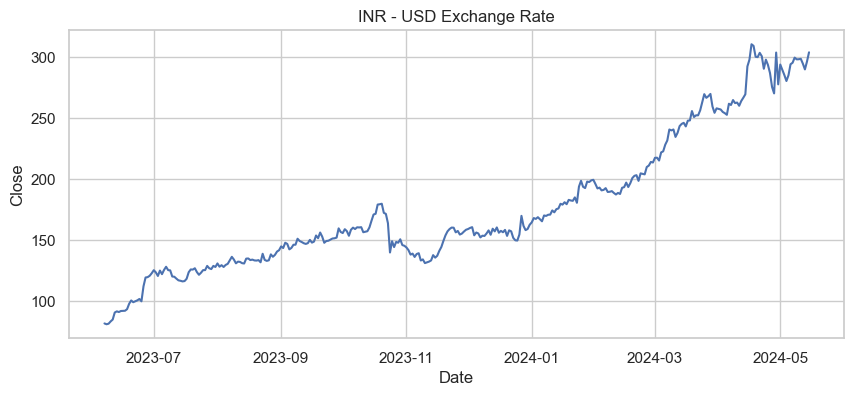

In [75]:
# Plotting show you the exchange rate
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df["Close"])
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")

plt.show()

## Preparing data for modelling

In [76]:
# Prepare data for model
x = df[["Open", "High", "Low"]].to_numpy()
y = df["Close"].to_numpy().reshape(-1, 1)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Train model

In [77]:
# Initialize and train the model
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

## Prediction and model evaluation

In [80]:
# Predict on the test set
y_pred = model.predict(x_test)
y_pred

array([140.75, 156.98, 156.98, 179.88, 125.34, 100.8 , 125.72, 138.77,
       182.61, 159.2 , 123.83, 197.72, 256.39, 192.73, 127.09, 243.27,
       194.  , 156.2 ,  92.17, 211.19, 160.4 , 293.67, 130.98, 285.34,
       156.59, 140.75, 192.73, 133.43, 160.57, 150.82, 248.19, 211.19,
       162.7 , 179.88, 263.2 , 183.1 , 129.61, 140.75, 303.98, 175.5 ,
       136.5 ,  91.78,  81.21, 210.  , 293.67, 188.75, 149.98, 202.8 ,
       256.39, 143.66, 211.19, 149.98, 126.41, 260.2 , 254.12, 145.49,
       172.47, 160.4 , 160.13, 145.49, 156.2 , 183.1 , 100.8 , 257.14,
       119.8 , 160.13, 211.19, 211.19, 297.98])

In [81]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 9.737878623188404
R^2 Score: 0.9967853722516371


## Actual vs. predicted values

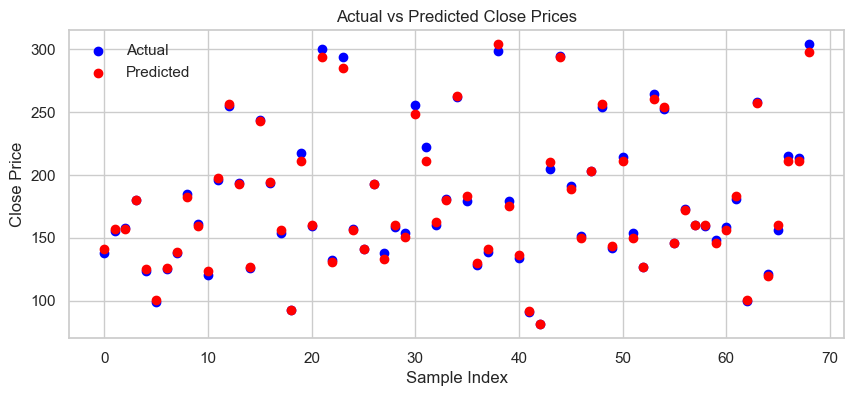

In [82]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(10, 4))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
    plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted')
    plt.title('Actual vs Predicted Close Prices')
    plt.xlabel('Sample Index')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# Plot actual vs predicted values
plot_actual_vs_predicted(y_test, y_pred)